✅ Raw data loaded — shape: (100000, 18)
🧩 Derived features added (dataset remains identical otherwise)


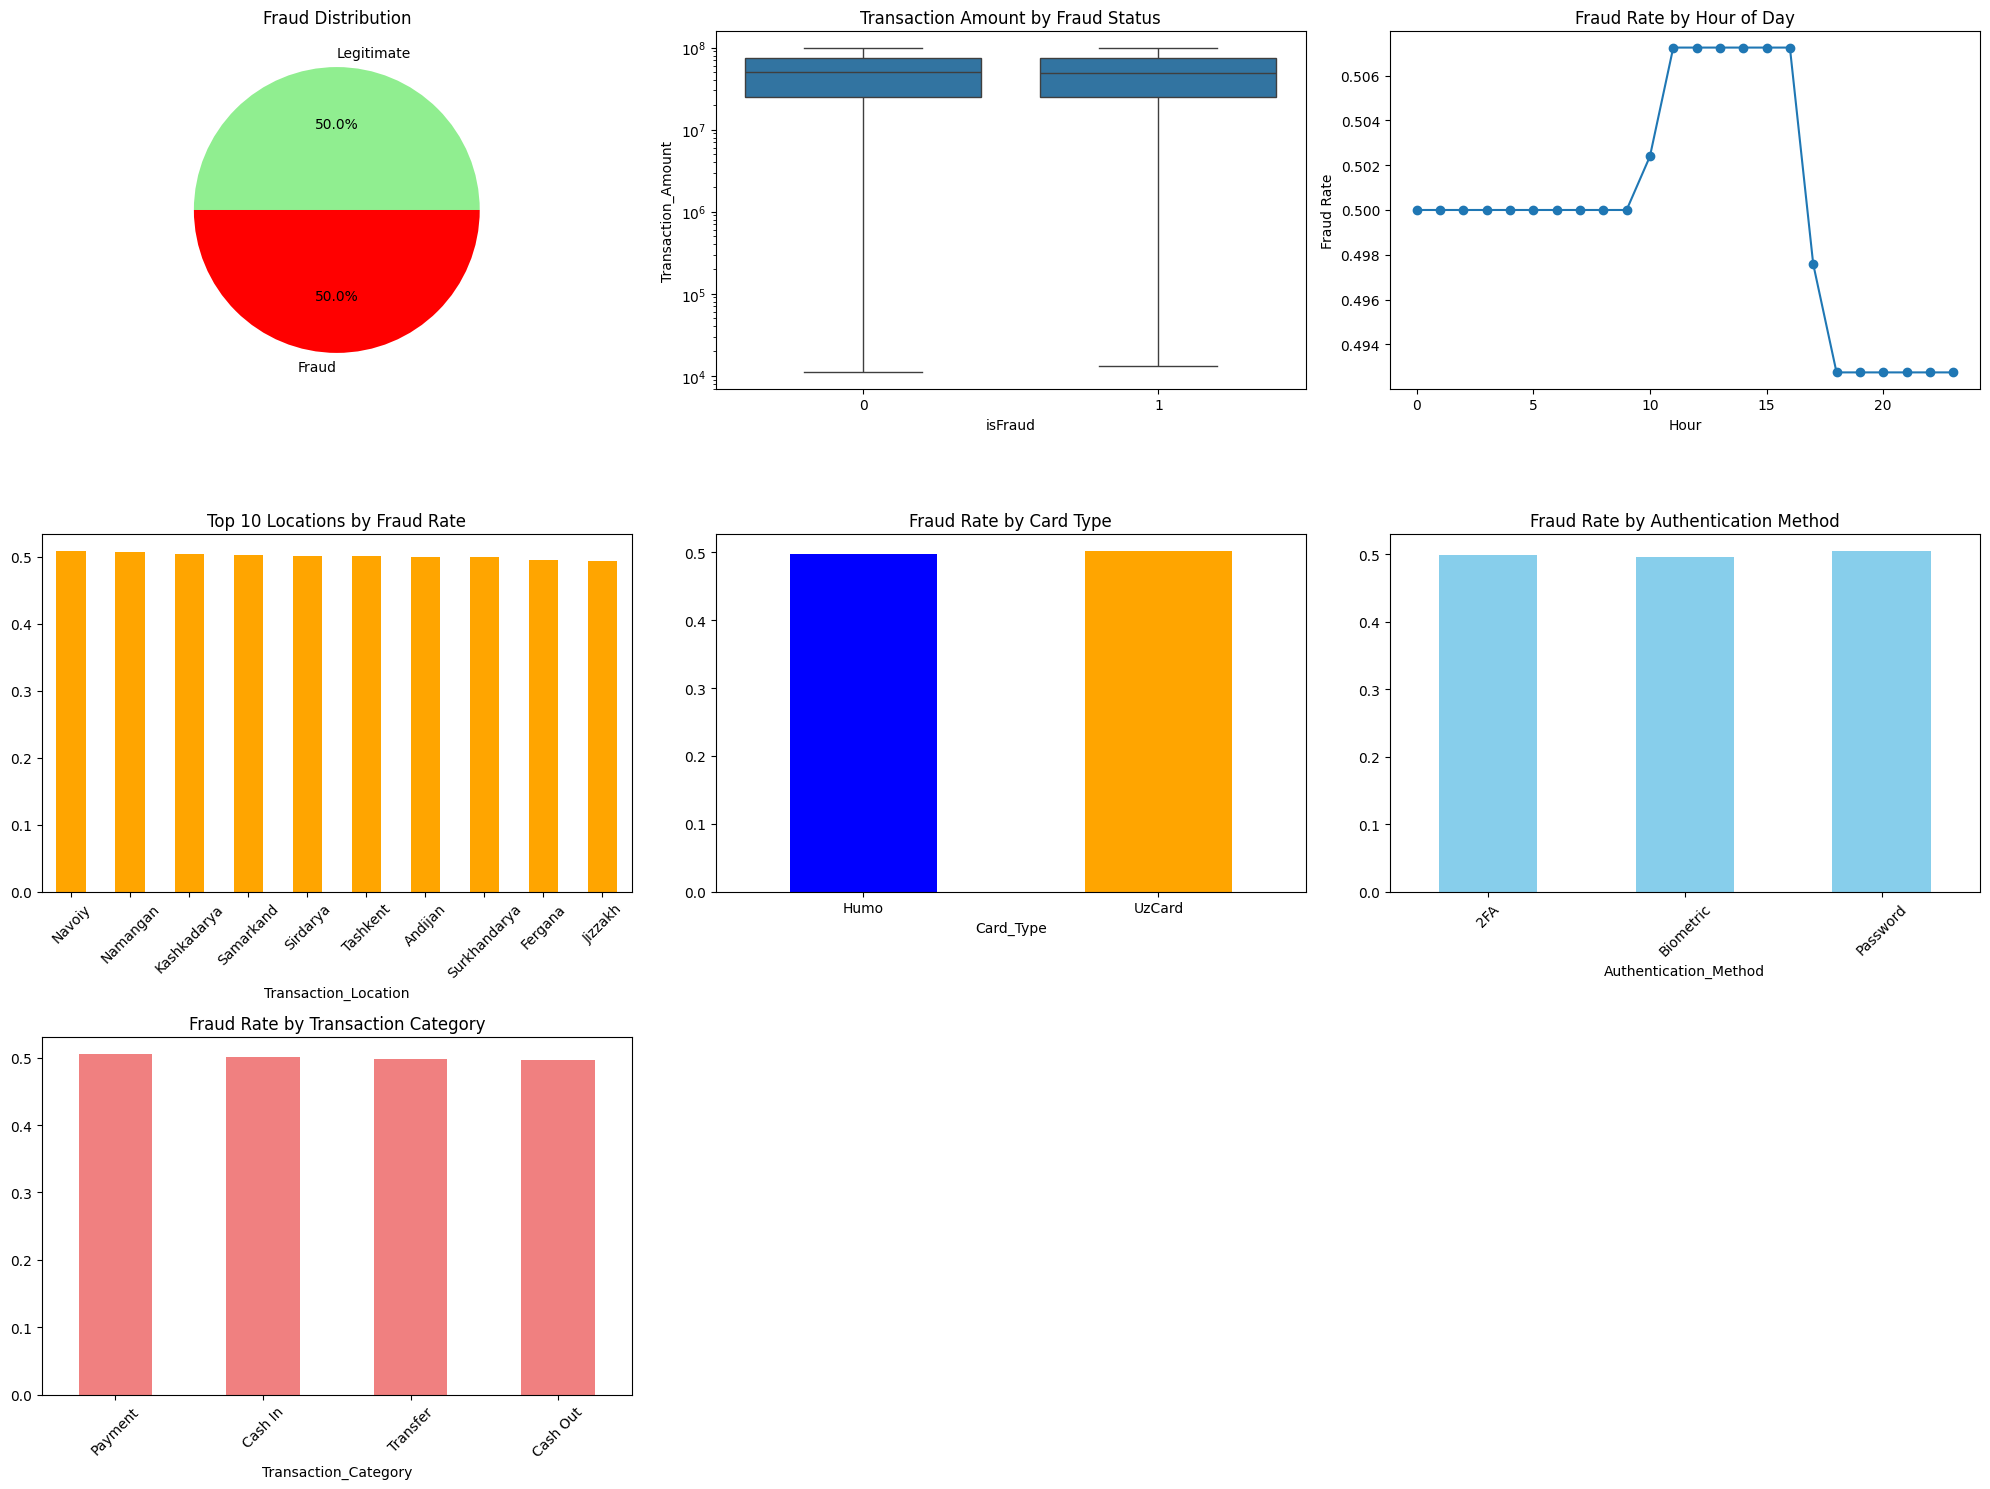

📊 EDA visuals saved to: C:\Users\sgvar\project no 1\Module1_EDA_Preprocessing\outputs\EDA_visuals\Module1_EDA_visuals.png
💾 Processed dataset saved (unaltered + derived features): C:\Users\sgvar\project no 1\Module1_EDA_Preprocessing\data\processed\card_fraud_processed_module1.csv

🎯 MODULE 1 SUMMARY
Total Records: 100000
Columns: 28 (including new derived features)
EDA visuals directory: C:\Users\sgvar\project no 1\Module1_EDA_Preprocessing\outputs\EDA_visuals
🚀 Module 1 completed successfully — dataset fully intact.


In [2]:
# =============================================================================
# MODULE 1 — CLEAN EDA & FEATURE CREATION (Predictive Transaction Intelligence - BFSI)
# =============================================================================
# ✅ Keeps raw dataset intact (no shuffling, scaling, or dropping)
# ✅ Adds only derived features + EDA visuals identical to final project
# =============================================================================

# !pip install pandas matplotlib seaborn scikit-learn --quiet

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# -----------------------------------------------------------------------------
# PATH CONFIGURATION (adjust if running locally)
# -----------------------------------------------------------------------------
BASE_DIR = r"C:\Users\sgvar\project no 1"
MODULE_DIR = os.path.join(BASE_DIR, "Module1_EDA_Preprocessing")
RAW_DATA_PATH = os.path.join(MODULE_DIR, "data", "raw", "card_fraud.csv")
PROCESSED_PATH = os.path.join(MODULE_DIR, "data", "processed", "card_fraud_processed_module1.csv")
EDA_OUTPUT_DIR = os.path.join(MODULE_DIR, "outputs", "EDA_visuals")

os.makedirs(os.path.dirname(PROCESSED_PATH), exist_ok=True)
os.makedirs(EDA_OUTPUT_DIR, exist_ok=True)

# -----------------------------------------------------------------------------
# STEP 1: LOAD RAW DATA
# -----------------------------------------------------------------------------
df = pd.read_csv(RAW_DATA_PATH)
print(f"✅ Raw data loaded — shape: {df.shape}")

# -----------------------------------------------------------------------------
# STEP 2: DERIVED FEATURES (add only, no alteration)
# -----------------------------------------------------------------------------
# Safe datetime conversion
if 'Transaction_Date' in df.columns:
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
if 'Transaction_Time' in df.columns:
    df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'].astype(str), errors='coerce').dt.time

# Derived time features
df['Transaction_Hour'] = pd.to_datetime(df['Transaction_Time'].astype(str), errors='coerce').dt.hour
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Month'] = df['Transaction_Date'].dt.month

# Log transaction amount
if 'Transaction_Amount' in df.columns:
    df['Log_Transaction_Amount'] = np.log1p(df['Transaction_Amount'])

# Encode categorical variables
categorical_columns = [
    'Transaction_Location', 'Card_Type', 'Transaction_Currency',
    'Transaction_Status', 'Authentication_Method', 'Transaction_Category'
]
label_encoders = {}
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

print("🧩 Derived features added (dataset remains identical otherwise)")

# -----------------------------------------------------------------------------
# STEP 3: EDA VISUALIZATIONS (identical to final reference version)
# -----------------------------------------------------------------------------
plt.figure(figsize=(20, 15))

# 1️⃣ Fraud Distribution
plt.subplot(3, 3, 1)
fraud_counts = df['isFraud'].value_counts()
plt.pie(fraud_counts.values, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%',
        colors=['lightgreen', 'red'])
plt.title('Fraud Distribution')

# 2️⃣ Transaction Amount vs Fraud Status
plt.subplot(3, 3, 2)
sns.boxplot(x='isFraud', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.yscale('log')

# 3️⃣ Fraud Rate by Hour of Day
plt.subplot(3, 3, 3)
fraud_by_hour = df.groupby('Transaction_Hour')['isFraud'].mean()
plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')

# 4️⃣ Top 10 Locations by Fraud Rate
plt.subplot(3, 3, 4)
if 'Transaction_Location' in df.columns:
    loc_fraud = df.groupby('Transaction_Location')['isFraud'].mean().sort_values(ascending=False).head(10)
    loc_fraud.plot(kind='bar', color='orange')
    plt.title('Top 10 Locations by Fraud Rate')
    plt.xticks(rotation=45)

# 5️⃣ Fraud Rate by Card Type
plt.subplot(3, 3, 5)
if 'Card_Type' in df.columns:
    card_fraud = df.groupby('Card_Type')['isFraud'].mean()
    card_fraud.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Fraud Rate by Card Type')
    plt.xticks(rotation=0)

# 6️⃣ Fraud Rate by Authentication Method
plt.subplot(3, 3, 6)
if 'Authentication_Method' in df.columns:
    auth_fraud = df.groupby('Authentication_Method')['isFraud'].mean().sort_index()
    auth_fraud.plot(kind='bar', color='skyblue')
    plt.title('Fraud Rate by Authentication Method')
    plt.xticks(rotation=45)

# 7️⃣ Fraud Rate by Transaction Category
plt.subplot(3, 3, 7)
if 'Transaction_Category' in df.columns:
    cat_fraud = df.groupby('Transaction_Category')['isFraud'].mean().sort_values(ascending=False)
    cat_fraud.plot(kind='bar', color='lightcoral')
    plt.title('Fraud Rate by Transaction Category')
    plt.xticks(rotation=45)

plt.tight_layout()
eda_path = os.path.join(EDA_OUTPUT_DIR, "Module1_EDA_visuals.png")
plt.savefig(eda_path, bbox_inches='tight')
plt.show()
print(f"📊 EDA visuals saved to: {eda_path}")

# -----------------------------------------------------------------------------
# STEP 4: SAVE PROCESSED DATA
# -----------------------------------------------------------------------------
df.to_csv(PROCESSED_PATH, index=False)
print(f"💾 Processed dataset saved (unaltered + derived features): {PROCESSED_PATH}")

# -----------------------------------------------------------------------------
# STEP 5: SUMMARY
# -----------------------------------------------------------------------------
print("\n🎯 MODULE 1 SUMMARY")
print("="*60)
print(f"Total Records: {len(df)}")
print(f"Columns: {len(df.columns)} (including new derived features)")
print(f"EDA visuals directory: {EDA_OUTPUT_DIR}")
print("🚀 Module 1 completed successfully — dataset fully intact.")


In [3]:
print(df.columns.tolist())


['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Date', 'Transaction_Time', 'Transaction_Location', 'Merchant_ID', 'Device_ID', 'Card_Type', 'Transaction_Currency', 'Transaction_Status', 'Previous_Transaction_Count', 'Distance_Between_Transactions_km', 'Time_Since_Last_Transaction_min', 'Authentication_Method', 'Transaction_Velocity', 'Transaction_Category', 'isFraud', 'Transaction_Hour', 'Transaction_Day', 'Transaction_Month', 'Log_Transaction_Amount', 'Transaction_Location_encoded', 'Card_Type_encoded', 'Transaction_Currency_encoded', 'Transaction_Status_encoded', 'Authentication_Method_encoded', 'Transaction_Category_encoded']
